In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
import cartopy as cy
import cartopy.crs as ccrs

from importcmip import cm245_3550
from importcmip import aod245_3550
import s3fs
xr.set_options(display_style='html')
import intake
import cftime
from netCDF4 import Dataset
from matplotlib.colors import LogNorm
import matplotlib.path as mpath
from matplotlib import rc,animation
from matplotlib.animation import FuncAnimation
from IPython import display


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [2]:
path = '20352050_AR_detection.nc'
ar3550 = xr.open_dataset(path)

In [3]:
# merge datasets
d245_3550 = cm245_3550.merge(aod245_3550.drop(('lat_bnds', 'time_bnds', 'lon_bnds')))

arc = d245_3550.sel(lat = slice(50,90))
ant =d245_3550.sel(lat = slice(-90,-50))

In [4]:
# mask data within and out of atmospheric rivers
marc = arc.where(ar3550['ivt'] == True)
mant = ant.where(ar3550['ivt'] == True)
amarc = arc.where(ar3550['ivt'] == False)
amant = ant.where(ar3550['ivt'] == False)

## Arctic

In [5]:
# for frequency plots slice for plev >25000 and integrate over plev
mpl =marc.sel(plev=slice(100000, 25000))
pl =amarc.sel(plev=slice(100000, 25000)).where(arc['va'] > 0)

# wind
mplva =-1*mpl['va'].integrate('plev')
plva =-1*pl['va'].integrate('plev')

# humidity
mplh =-1*mpl['hus'].integrate('plev')
plh =-1*pl['hus'].integrate('plev')


In [6]:
mv = mplva.values.flatten()
mv = mv[~np.isnan(mv)]
v = plva.values.flatten()
v= v[~np.isnan(v)]
mh = mplh.values.flatten()
mh = mh[~np.isnan(mh)]
h = plh.values.flatten()
h = h[~np.isnan(h)]
mcc = pl['clt'].values.flatten()
mcc = mcc[~np.isnan(mcc)]
cc = mpl['clt'].values.flatten()
cc = cc[~np.isnan(cc)]
mt = mpl['tas'].values.flatten()
mt = mt[~np.isnan(mt)]
t = pl['tas'].values.flatten()
t = t[~np.isnan(t)]
ma = mpl['od550aer'].values.flatten()
ma = ma[~np.isnan(ma)]
a = pl['od550aer'].values.flatten()
a = a[~np.isnan(a)]
mp = mpl['pr'].values.flatten()
mp = mp[~np.isnan(mp)]
mp = mp[mp>0.0000024099]
p = pl['pr'].values.flatten()
p = p[~np.isnan(p)]
p = p[p>0.0000024099] # threshold for averaged precipitation in the sahara in the same unit

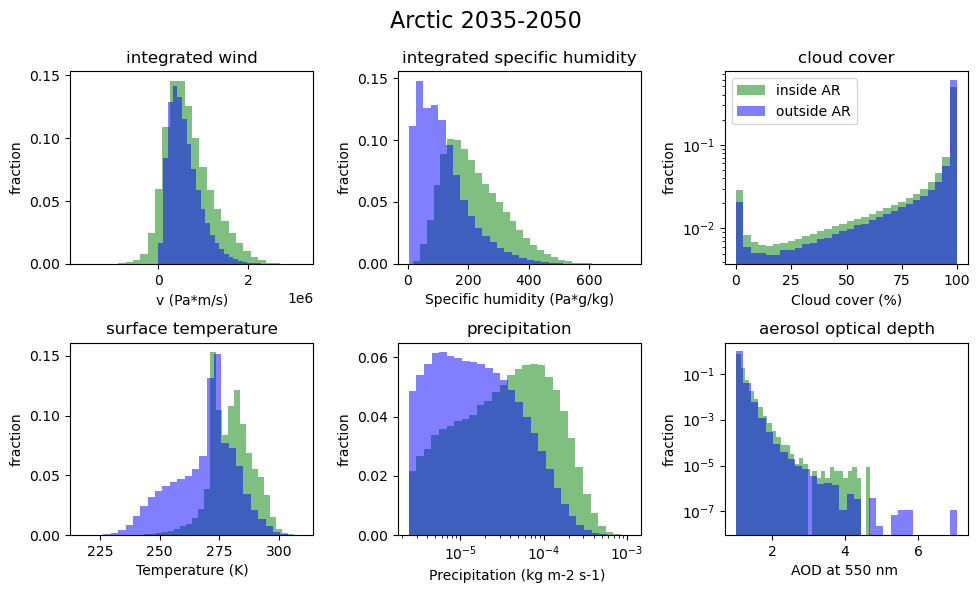

In [7]:
fig, axs = plt.subplots(2,3, figsize=(10,6))
axs = axs.flatten()
fig.suptitle('Arctic 2035-2050', fontsize=16)
axs[0].hist(mv, weights = np.zeros_like(mv)+1./mv.size, 
           alpha = 0.5, color = "g", label = "inside AR", bins=30)
axs[0].hist(v, weights = np.zeros_like(v)+1./v.size, 
           alpha = 0.5, color = "b", label = "outside AR", bins=30)
axs[1].hist(mh, weights = np.zeros_like(mh)+1./mh.size, 
           alpha = 0.5, color = "g", label = "inside AR", bins=30)
axs[1].hist(h, weights = np.zeros_like(h)+1./h.size, 
           alpha = 0.5, color = "b", label = "outside AR", bins=30)
axs[2].hist(mcc, weights = np.zeros_like(mcc)+1./mcc.size, 
           alpha = 0.5, color = "g", label = "inside AR", bins=30)
axs[2].hist(cc,  weights = np.zeros_like(cc)+1./cc.size, 
           alpha = 0.5, color = "b", label = "outside AR", bins=30)
axs[3].hist(mt, weights = np.zeros_like(mt)+1./mt.size, 
           alpha = 0.5, color = "g", label = "inside AR", bins=30)
axs[3].hist(t, weights = np.zeros_like(t)+1./t.size, 
           alpha = 0.5, color = "b", label = "outside AR", bins=30)
axs[4].hist(mp, weights = np.zeros_like(mp)+1./mp.size, 
           alpha = 0.5, color = "g", label = "inside AR", bins=np.logspace(np.log10(mp.min()),np.log10(mp.max()),30))
axs[4].hist(p, weights = np.zeros_like(p)+1./p.size,
           alpha = 0.5, color = "b", label = "outside AR", bins=np.logspace(np.log10(p.min()),np.log10(p.max()),30))
axs[5].hist(ma, weights = np.zeros_like(ma)+1./ma.size, 
           alpha = 0.5, color = "g", label = "inside AR", bins = 30)
axs[5].hist(a, weights = np.zeros_like(a)+1./a.size,
           alpha = 0.5, color = "b", label = "outside AR", bins = 30)
axs[0].set_title('integrated wind')
axs[0].set(ylabel = 'fraction', xlabel = 'v (Pa*m/s)')
axs[1].set_title('integrated specific humidity')
axs[1].set(ylabel = 'fraction', xlabel = 'Specific humidity (Pa*g/kg)')
axs[2].set_title('cloud cover')
axs[2].legend()
axs[2].set(ylabel = 'fraction', xlabel = 'Cloud cover (%)', yscale ='log')
axs[3].set_title('surface temperature')
axs[3].set(ylabel = 'fraction', xlabel = 'Temperature (K)')
axs[4].set_title('precipitation')
axs[4].set(ylabel = 'fraction', xlabel = 'Precipitation (kg m-2 s-1) ', xscale = 'log')
axs[5].set_title('aerosol optical depth')
axs[5].set(ylabel = 'fraction', xlabel = 'AOD at 550 nm ',  yscale= 'log')
plt.tight_layout()


## Antarctic

In [8]:
# for frequency plots slice for plev >25000 and integrate over plev
mpl =mant.sel(plev=slice(100000, 25000))
pl =amant.sel(plev=slice(100000, 25000)).where(ant['va'] < 0)

# wind
mplva =-1*mpl['va'].integrate('plev')
plva =-1*pl['va'].integrate('plev')

# humidity
mplh =-1*mpl['hus'].integrate('plev')
plh =-1*pl['hus'].integrate('plev')


In [9]:
mv = mplva.values.flatten()
mv = mv[~np.isnan(mv)]
v = plva.values.flatten()
v= v[~np.isnan(v)]
mh = mplh.values.flatten()
mh = mh[~np.isnan(mh)]
h = plh.values.flatten()
h = h[~np.isnan(h)]
mcc = pl['clt'].values.flatten()
mcc = mcc[~np.isnan(mcc)]
cc = mpl['clt'].values.flatten()
cc = cc[~np.isnan(cc)]
mt = mpl['tas'].values.flatten()
mt = mt[~np.isnan(mt)]
t = pl['tas'].values.flatten()
t = t[~np.isnan(t)]
ma = mpl['od550aer'].values.flatten()
ma = ma[~np.isnan(ma)]
a = pl['od550aer'].values.flatten()
a = a[~np.isnan(a)]
mp = mpl['pr'].values.flatten()
mp = mp[~np.isnan(mp)]
mp = mp[mp>0.0000024099]
p = pl['pr'].values.flatten()
p = p[~np.isnan(p)]
p = p[p>0.0000024099] # threshold for averaged precipitation in the sahara in the same unit

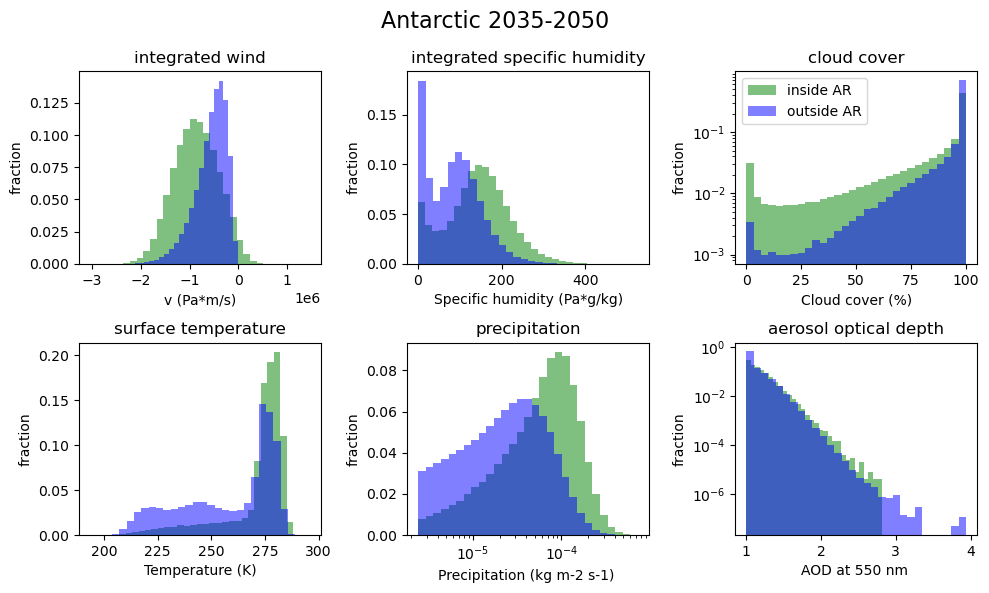

In [10]:
fig, axs = plt.subplots(2,3, figsize=(10,6))
axs = axs.flatten()
fig.suptitle('Antarctic 2035-2050', fontsize=16)
axs[0].hist(mv, weights = np.zeros_like(mv)+1./mv.size, 
           alpha = 0.5, color = "g", label = "inside AR", bins=30)
axs[0].hist(v, weights = np.zeros_like(v)+1./v.size, 
           alpha = 0.5, color = "b", label = "outside AR", bins=30)
axs[1].hist(mh, weights = np.zeros_like(mh)+1./mh.size, 
           alpha = 0.5, color = "g", label = "inside AR", bins=30)
axs[1].hist(h, weights = np.zeros_like(h)+1./h.size, 
           alpha = 0.5, color = "b", label = "outside AR", bins=30)
axs[2].hist(mcc, weights = np.zeros_like(mcc)+1./mcc.size, 
           alpha = 0.5, color = "g", label = "inside AR", bins=30)
axs[2].hist(cc,  weights = np.zeros_like(cc)+1./cc.size, 
           alpha = 0.5, color = "b", label = "outside AR", bins=30)
axs[3].hist(mt, weights = np.zeros_like(mt)+1./mt.size, 
           alpha = 0.5, color = "g", label = "inside AR", bins=30)
axs[3].hist(t, weights = np.zeros_like(t)+1./t.size, 
           alpha = 0.5, color = "b", label = "outside AR", bins=30)
axs[4].hist(mp, weights = np.zeros_like(mp)+1./mp.size, 
           alpha = 0.5, color = "g", label = "inside AR", bins=np.logspace(np.log10(mp.min()),np.log10(mp.max()),30))
axs[4].hist(p, weights = np.zeros_like(p)+1./p.size,
           alpha = 0.5, color = "b", label = "outside AR", bins=np.logspace(np.log10(p.min()),np.log10(p.max()),30))
axs[5].hist(ma, weights = np.zeros_like(ma)+1./ma.size, 
           alpha = 0.5, color = "g", label = "inside AR", bins = 30)
axs[5].hist(a, weights = np.zeros_like(a)+1./a.size,
           alpha = 0.5, color = "b", label = "outside AR", bins = 30)
axs[0].set_title('integrated wind')
axs[0].set(ylabel = 'fraction', xlabel = 'v (Pa*m/s)')
axs[1].set_title('integrated specific humidity')
axs[1].set(ylabel = 'fraction', xlabel = 'Specific humidity (Pa*g/kg)')
axs[2].set_title('cloud cover')
axs[2].legend()
axs[2].set(ylabel = 'fraction', xlabel = 'Cloud cover (%)', yscale ='log')
axs[3].set_title('surface temperature')
axs[3].set(ylabel = 'fraction', xlabel = 'Temperature (K)')
axs[4].set_title('precipitation')
axs[4].set(ylabel = 'fraction', xlabel = 'Precipitation (kg m-2 s-1) ', xscale = 'log')
axs[5].set_title('aerosol optical depth')
axs[5].set(ylabel = 'fraction', xlabel = 'AOD at 550 nm ',  yscale= 'log')
plt.tight_layout()
